# Mapping with geopandas 
learning from here: http://darribas.org/gds16/content/labs/lab_02.html

I thought I would spend a day to go through this lab by Dani Arribas-Bel in order to learn more about using shapes, geopandas and mplleaflet more effectively for data analysis/science/engineering.

\* most of the code is from the link above, I have only updated some of the syntax to match the updated documentation for some of the modules and made small amendments here and there.

## Load in relevant libraries

In [84]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps
import palettable as pltt
from seaborn import palplot

## Assigns directories to variables
* Census geographies [https://data.cdrc.ac.uk/dataset/cdrc-2011-census-data-packs-for-local-authority-district-liverpool-e08000012]
* Ordnance Survey geospatial data [https://data.cdrc.ac.uk/dataset/cdrc-2015-os-geodata-pack-liverpool-e08000012]

In [18]:
# Liverpool Census Pack
lcp_dir = 'Liverpool/'

# Liverpool Ordnance Survey
los_dir = 'E08000012/'

## Loading Spatial Data

### Polygons
Using Liverpool LSOA --> Lower Layer Super Output Area (LSOA)

In [19]:
lsoas_link = lcp_dir + 'shapefiles/Liverpool_lsoa11.shp'
lsoas = gpd.read_file(lsoas_link)
lsoas.head()

,LSOA11CD,geometry
0,E01006512,"POLYGON ((336103.358 389628.58, 336103.416 389..."
1,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38..."
2,E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38..."
3,E01006515,"POLYGON ((334953.001 389029, 334951 389035, 33..."
4,E01006518,"POLYGON ((335354.015 388601.947, 335354 388602..."


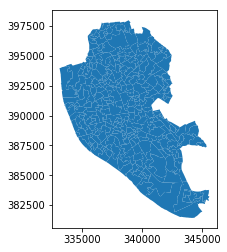

In [20]:
lsoas.plot()

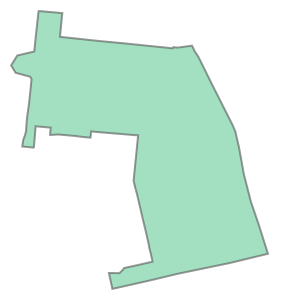

In [21]:
lsoas.loc[0, 'geometry']

### Lines
Using railway tunnels in Liverpool

In [22]:
rwy_tun = gpd.read_file(los_dir + 'RailwayTunnel.shp')
rwy_tun = rwy_tun.set_index('id')
rwy_tun.head()

,featcode,geometry
id,,
0ACD196C321E4F8DE050A00A568A6F6F,15303.0,"LINESTRING (333935.06 390059.48, 333356.363398..."
0ACD196C321F4F8DE050A00A568A6F6F,15303.0,"LINESTRING (334337.39 390481.53, 334327.57 390..."
0ACD196C32204F8DE050A00A568A6F6F,15303.0,"LINESTRING (334332.51 390283.66, 334264.38 390..."
0ACD196C32214F8DE050A00A568A6F6F,15303.0,"LINESTRING (333965.82 391116.37, 334028.32 391..."
0ACD196C32264F8DE050A00A568A6F6F,15303.0,"LINESTRING (334337.39 390481.53, 334307.81 390..."


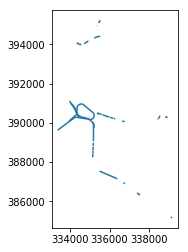

In [23]:
rwy_tun.plot()

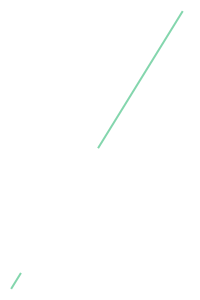

In [24]:
rwy_tun.loc['0ACD196C313D4F8DE050A00A568A6F6F', 'geometry']

### Points
Using named places in Liverpool

In [25]:
namp = gpd.read_file(los_dir + 'NamedPlace.shp')
namp.head()

,id,distname,htmlname,classifica,fontheight,orientatio,featcode,geometry
0,0EE7A103C03A8FBFE050A00A568A2502,Sugar Brook,Sugar Brook,Hydrography,Small,25.0,15804.0,POINT (339605 396261)
1,0EE7A104A4B68FBFE050A00A568A2502,Sandfield Park,Sandfield Park,Landcover,Small,0.0,15805.0,POINT (339758 392357)
2,0EE7A1041DB18FBFE050A00A568A2502,Sandfield Park,Sandfield Park,Populated Place,Medium,0.0,15801.0,POINT (339768 392217)
3,0EE7A1041DE48FBFE050A00A568A2502,Gillmoss,Gillmoss,Populated Place,Medium,0.0,15801.0,POINT (340269 396567)
4,0EE7A1041DE58FBFE050A00A568A2502,Croxteth,Croxteth,Populated Place,Medium,0.0,15801.0,POINT (340296 395304)


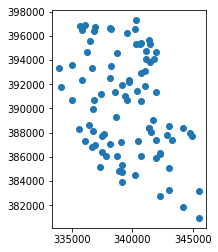

In [26]:
namp.plot()

## Styling the plots

### Changing Transparency

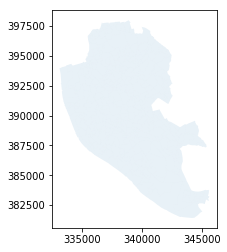

In [27]:
lsoas.plot(alpha=0.1)

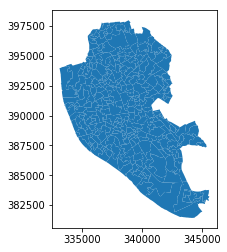

In [28]:
lsoas.plot(alpha=1)

### Removing Axes

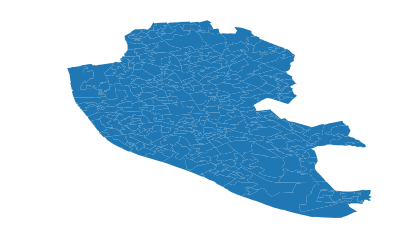

In [29]:
f, ax = plt.subplots(1)
ax = lsoas.plot(ax=ax)
ax.set_axis_off()
plt.show()

### Adding a title

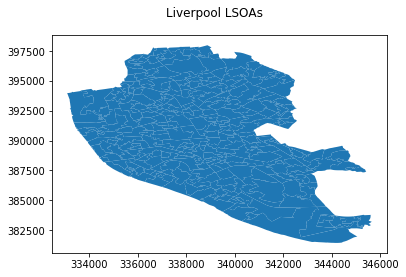

In [30]:
f, ax = plt.subplots(1)
ax = lsoas.plot(ax=ax)
f.suptitle('Liverpool LSOAs')
plt.show()

### Changing the size of the map

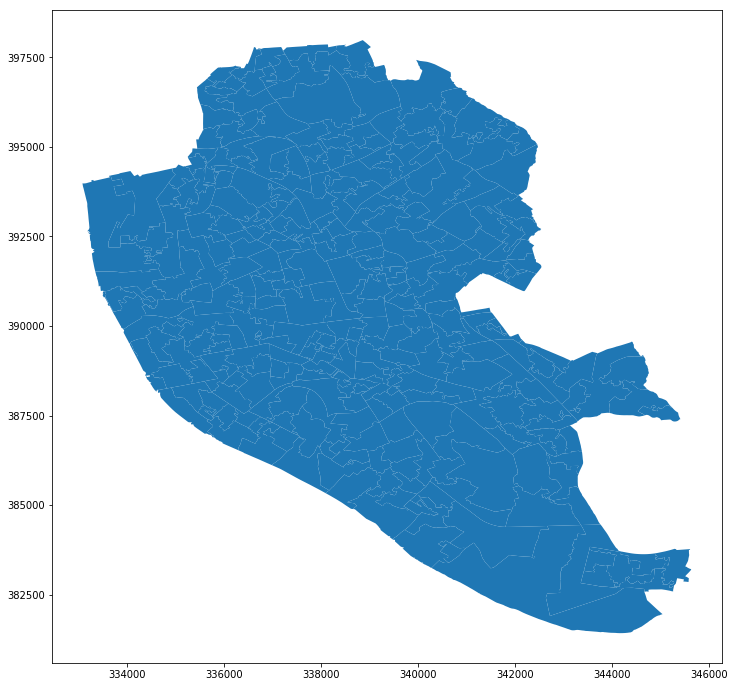

In [31]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = lsoas.plot(ax=ax)
plt.show()

### Scaling Plots

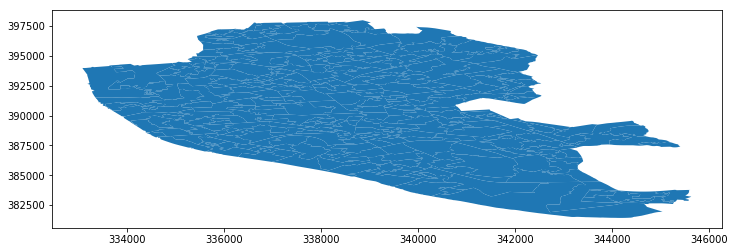

In [32]:
f, ax = plt.subplots(1, figsize=(12, 4))
ax = lsoas.plot(ax=ax)
plt.show()

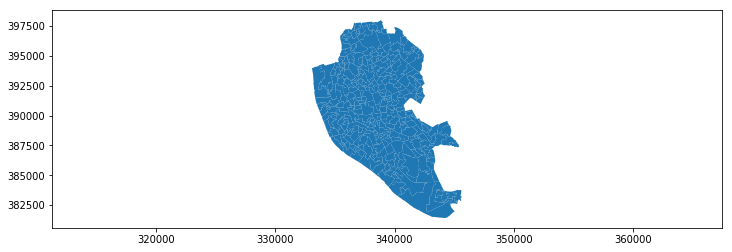

In [33]:
f, ax = plt.subplots(1, figsize=(12, 4))
ax = lsoas.plot(ax=ax)
lims = plt.axis('equal')
plt.show()

### Modifying Borders

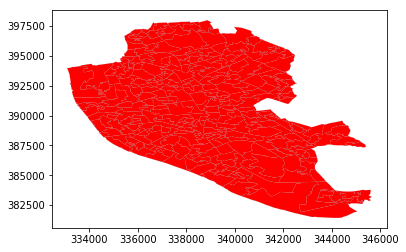

In [34]:
f, ax = plt.subplots(1)
# Add layer of polygons on the axis, set fill color (`facecolor`) and boundary
# color (`edgecolor`)
lsoas.plot(linewidth=0.1, facecolor='red', edgecolor='grey', ax=ax)
plt.show()

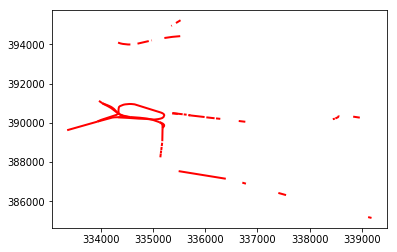

In [35]:
f, ax = plt.subplots(1)
# Add layer with lines, set them red and with different line width
# and append it to the axis `ax`
rwy_tun.plot(linewidth=2, color='red', ax=ax)
plt.show()

### Transforming CRS
The coordindate reference system (CRS) is the way geographers and cartographers have to represent a three-dimentional object on a two-dimensional plane.

In [36]:
lsoas.crs

{'datum': 'OSGB36',
 'k': 0.9996012717,
 'lat_0': 49,
 'lon_0': -2,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 400000,
 'y_0': -100000}

It is using the datum "OSGB36. 

If we want to modify this and "reproject" the polygons into a different CRS, the easiest way is to find the EPSG code online. For example, if we wanted to transform the dataset into lat/lon coordinates, we would use its EPSG code, 4326:

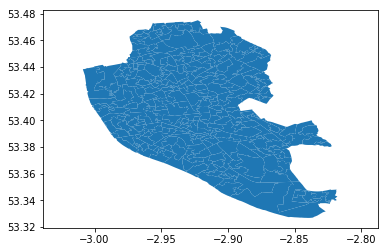

In [37]:
lsoas.to_crs(epsg=4326).plot()
lims = plt.axis('equal')

### Bringing it all together
* Includes a title
* Does not include axes frame
* It is proportioned and has a figure size of 10 by 11.
* Polygons are all in the color "#525252" and fully opaque.
* Lines have a width of 0.3 and are of color "#B9EBE3"

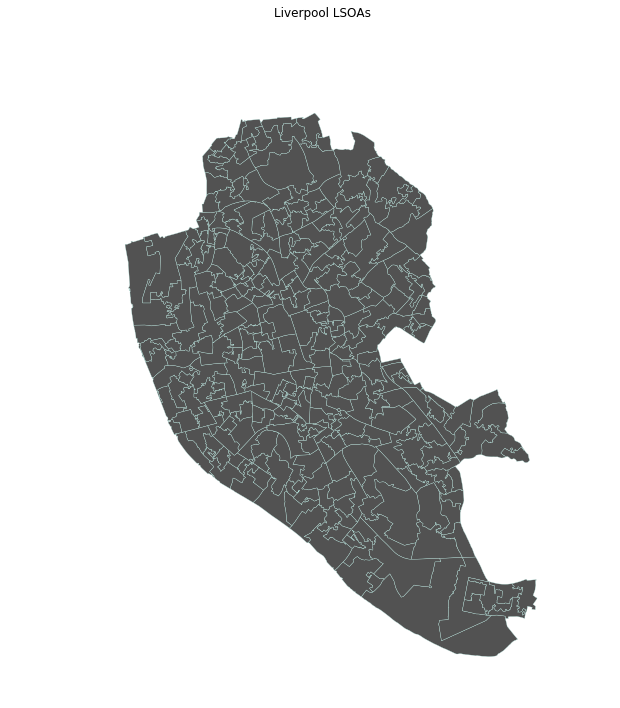

In [38]:
f, ax = plt.subplots(1, figsize=(10, 11))
f.suptitle('Liverpool LSOAs')
lsoas.plot(linewidth=0.3, alpha=1, facecolor='#525252', edgecolor='#B9EBE3', ax=ax)
lims = plt.axis('equal')
ax.set_axis_off()
plt.show()

---

## Composing Multi-layer Maps
Essentially, combining different layers on a single map boils down to adding each of them to the same axis in a sequential way, as if we were literally overlaying one on top of the previous one. 

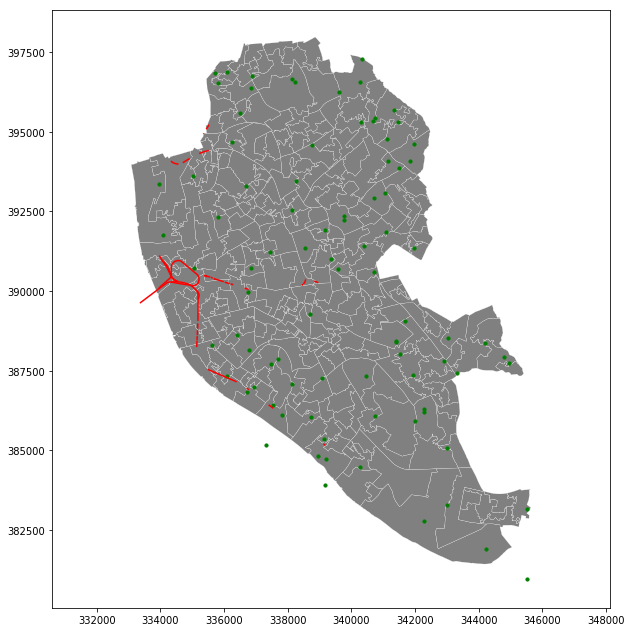

In [39]:
f, ax = plt.subplots(1, figsize=(10, 11))
lsoas.plot(ax=ax, facecolor='grey', edgecolor='white', linewidth=0.2)
rwy_tun.plot(ax=ax, color='red')
namp.plot(ax=ax, color = 'green', markersize=10)
lims = plt.axis('equal')
plt.show()

---

## Using Palettes

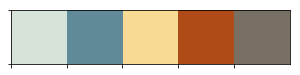

In [40]:
wes = pltt.wesanderson.Darjeeling2_5.hex_colors
palplot(wes)

In [41]:
wes

['#D5E3D8', '#618A98', '#F9DA95', '#AE4B16', '#787064']

For the sake of the example, let us use the following layers, available from the OS pack:

* TidalWater
* Road
* TidalBoundary
* FunctionalSite
* And the LSOA polygons used above.

In [42]:
tidW = gpd.read_file(los_dir+'TidalWater.shp')
tidB = gpd.read_file(los_dir+'TidalBoundary.shp')
funS = gpd.read_file(los_dir+'FunctionalSite.shp')
road = gpd.read_file(los_dir+'Road.shp')

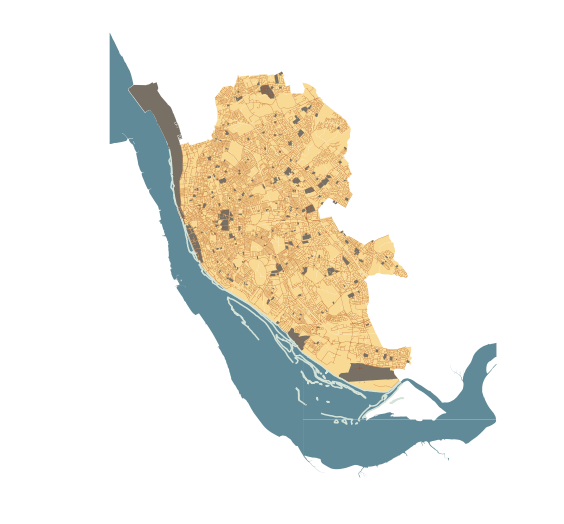

In [43]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Add tidal water (remove boundary lines for the polygons)
tidW.plot(ax=ax, facecolor='#618A98', linewidth=0.)
# Add tidal boundaries
tidB.plot(ax=ax, color='#D5E3D8')
# Add LSOAs
lsoas.plot(ax=ax, facecolor='#F9DA95', edgecolor='#F9DA95', linewidth=0.)
# Add roads
road.plot(ax=ax, color='#AE4B16', linewidth=0.2)
# Add functional sites (remove boundary lines for the polygons)
funS.plot(ax=ax, facecolor='#787064', linewidth=0.)
# Remove axes
ax.set_axis_off()
# Impose same size for units across axes
plt.axis('equal')
# Display
plt.show()

---

## Saving Maps to Figures

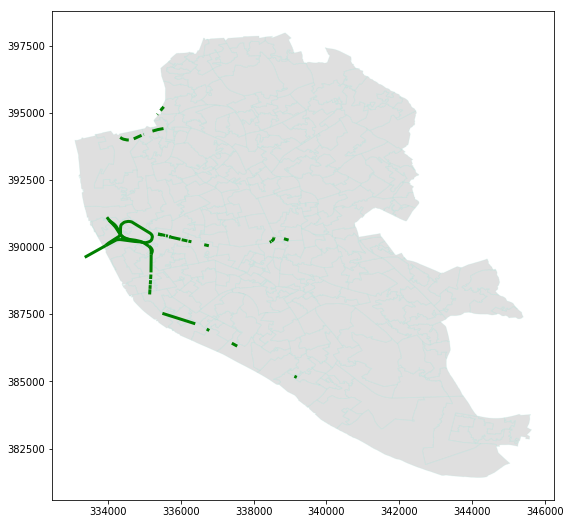

In [44]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot polygon layer
lsoas.plot(ax=ax, facecolor='grey', edgecolor='#B9EBE3', alpha=0.25, linewidth=0.8)
# Plot line layer
rwy_tun.plot(ax=ax, color='green', linewidth=3)
# Save figure to a PNG file
plt.savefig('liverpool_railway_tunels.png', dpi=1080)

---

## Manipulating Spatial Tables (GeoDataFrames)
csv file can be downloaded here: http://darribas.org/gds16/content/labs/data/liv_pop.csv

In [45]:
import pandas as pd
tab_path = 'liv_pop.csv'

In [46]:
lsoa_orig_sub = pd.read_csv(tab_path, index_col=0)
lsoa_orig_sub['Total'] = lsoa_orig_sub.sum(axis=1)
lsoa_orig_sub.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


In [47]:
lsoas.head()

,LSOA11CD,geometry
0,E01006512,"POLYGON ((336103.358 389628.58, 336103.416 389..."
1,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38..."
2,E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38..."
3,E01006515,"POLYGON ((334953.001 389029, 334951 389035, 33..."
4,E01006518,"POLYGON ((335354.015 388601.947, 335354 388602..."


In [48]:
geo_pop = lsoas.join(lsoa_orig_sub, on='LSOA11CD')
geo_pop.head()

,LSOA11CD,geometry,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
0,E01006512,"POLYGON ((336103.358 389628.58, 336103.416 389...",910,106,840,24,0,1880
1,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38...",2225,61,595,53,7,2941
2,E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38...",1786,63,193,61,5,2108
3,E01006515,"POLYGON ((334953.001 389029, 334951 389035, 33...",974,29,185,18,2,1208
4,E01006518,"POLYGON ((335354.015 388601.947, 335354 388602...",1531,69,73,19,4,1696


In [49]:
geo_pop.crs = lsoas.crs

## Non-spatial Manipulations

In [50]:
smallest = geo_pop.sort_values('Total').head(10)

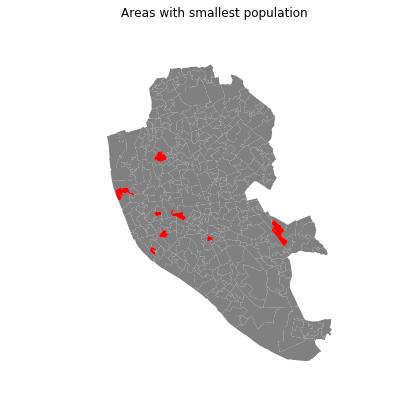

In [51]:
f, ax = plt.subplots(1, figsize=(6, 6))
# Base layer with all the areas for the background
geo_pop.plot(facecolor='grey', linewidth=0.025, ax=ax)
# Smallest areas
smallest.plot(alpha=1, facecolor='red', linewidth=0, ax=ax)
ax.set_axis_off()
f.suptitle('Areas with smallest population')
plt.axis('equal')
plt.show()

## Spatial Manipulations

### Centroid Calculation

In [52]:
cents = geo_pop.centroid
cents.head()

0     POINT (336154.2863649924 389733.635773753)
1    POINT (335535.9278617767 390060.8596847057)
2    POINT (335525.0607160075 389484.4020273419)
3    POINT (335117.4359614222 389195.6749620197)
4     POINT (335532.691301766 388692.8415110898)
dtype: object

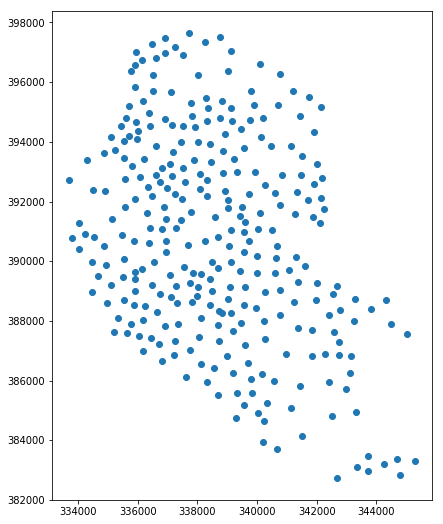

In [53]:
cents.plot(figsize=(9, 9))

### Point in Polygon (PiP)
Knowing whether a point is inside a polygon is conceptually a simple exercise but computationally a tricky task to perform.

In [54]:
poly = geo_pop['geometry'][0]
pt1 = cents[0]
pt2 = cents[1]

In [55]:
poly.contains(pt1)

True

In [56]:
poly.contains(pt2)

False

### Buffers

In [57]:
namp.crs

{'init': 'epsg:27700'}

These tells us it uses projection 27700 in the EPSG system. It corresponds with the Ordnance Survey projection, which is expressed in metres. Hence a buffer of 500m around each of these places:

In [58]:
buf = namp.buffer(500)
buf.head()

0    POLYGON ((340105 396261, 340102.5923633361 396...
1    POLYGON ((340258 392357, 340255.5923633361 392...
2    POLYGON ((340268 392217, 340265.5923633361 392...
3    POLYGON ((340769 396567, 340766.5923633361 396...
4    POLYGON ((340796 395304, 340793.5923633361 395...
dtype: object

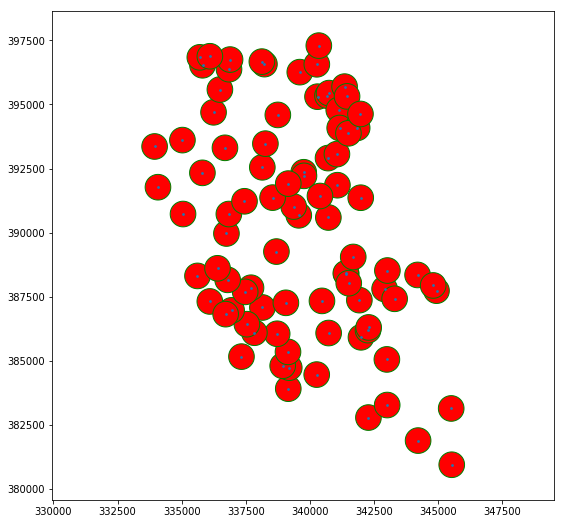

In [59]:
f, ax = plt.subplots(1, figsize=(9, 9))
buf.plot(color = 'red', edgecolor='green', ax=ax)
namp.plot(ax=ax, markersize=3)
plt.axis('equal')
plt.show()

---

## Interactive Maps

In [60]:
import mplleaflet

In [61]:
f, ax = plt.subplots(1)
ax = namp.plot(ax=ax, color = 'green', markersize=10)
mplleaflet.display(fig=f, crs=namp.crs)

In [62]:
f, ax = plt.subplots(1)
ax = rwy_tun.plot(ax=ax, color='red')
mplleaflet.display(fig=f, crs=rwy_tun.crs)

----

## Adding Base Layers from Raster Imagery
http://darribas.org/gds16/content/labs/figs/lab02_GBOverview.tif

In [63]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
source = rasterio.open('lab02_GBOverview.tif', 'r')
## Read red spectrum
red = source.read(1)
## Read green spectrum
green = source.read(2)
## Read blue spectrum
blue = source.read(3)
## Stack RGB values into a single array
pix = np.dstack((red, green, blue))
## Re-arrange bounding box to plot
bounds = (source.bounds.left, source.bounds.right, source.bounds.bottom, source.bounds.top)

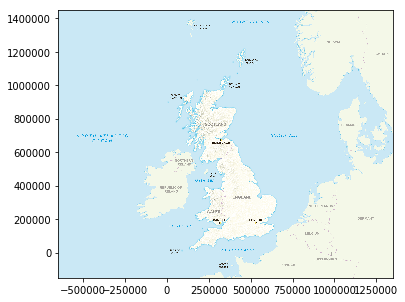

In [65]:
f = plt.figure(figsize=(6, 6))
ax = plt.imshow(pix, extent=bounds)